In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg 


In [2]:
path = 'C:/Users/salon/Desktop/Jupyter/acne vs eczema vs psoriasis/train'
classes = os.listdir(path)
classes


['acne', 'eczema', 'psoriasis']

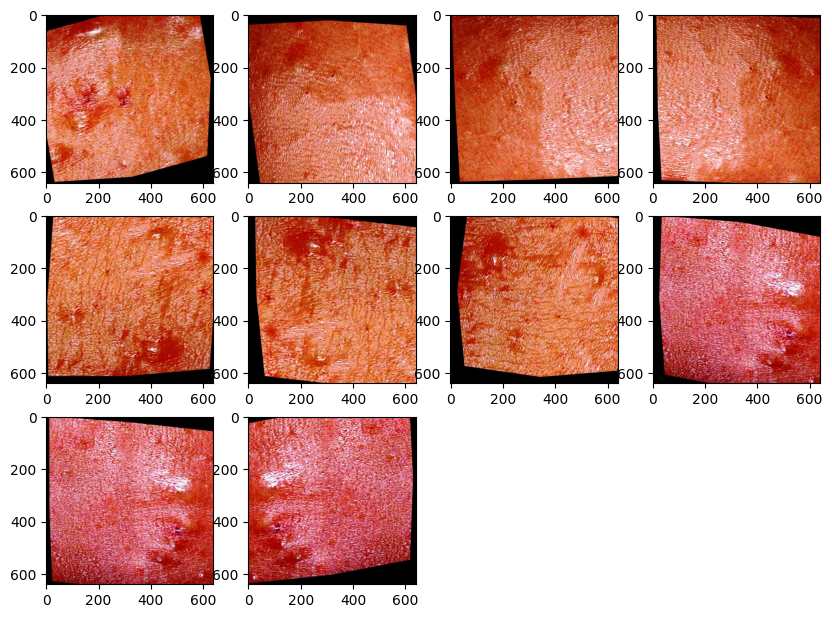

In [3]:
fig = plt.gcf()
fig.set_size_inches(10, 10) 

acne_dir = os.path.join('C:/Users/salon/Desktop/Jupyter/acne vs eczema vs psoriasis/train/acne')
eczema_dir = os.path.join('C:/Users/salon/Desktop/Jupyter/acne vs eczema vs psoriasis/train/eczema')
psoriasis_dir = os.path.join('C:/Users/salon/Desktop/Jupyter/acne vs eczema vs psoriasis/train/psoriasis')


acne_names = os.listdir(acne_dir)
eczema_names = os.listdir(eczema_dir)
psoriasis_names = os.listdir(psoriasis_dir)

pic_index = 210

acne_images = [os.path.join(acne_dir, fname)
              for fname in acne_names[pic_index-10:pic_index]]

eczema_images = [os.path.join(eczema_dir, fname)
              for fname in eczema_names[pic_index-10:pic_index]]

psoriasis_images = [os.path.join(psoriasis_dir, fname)
              for fname in psoriasis_names[pic_index-10:pic_index]]

for i, img_path in enumerate(acne_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('on')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


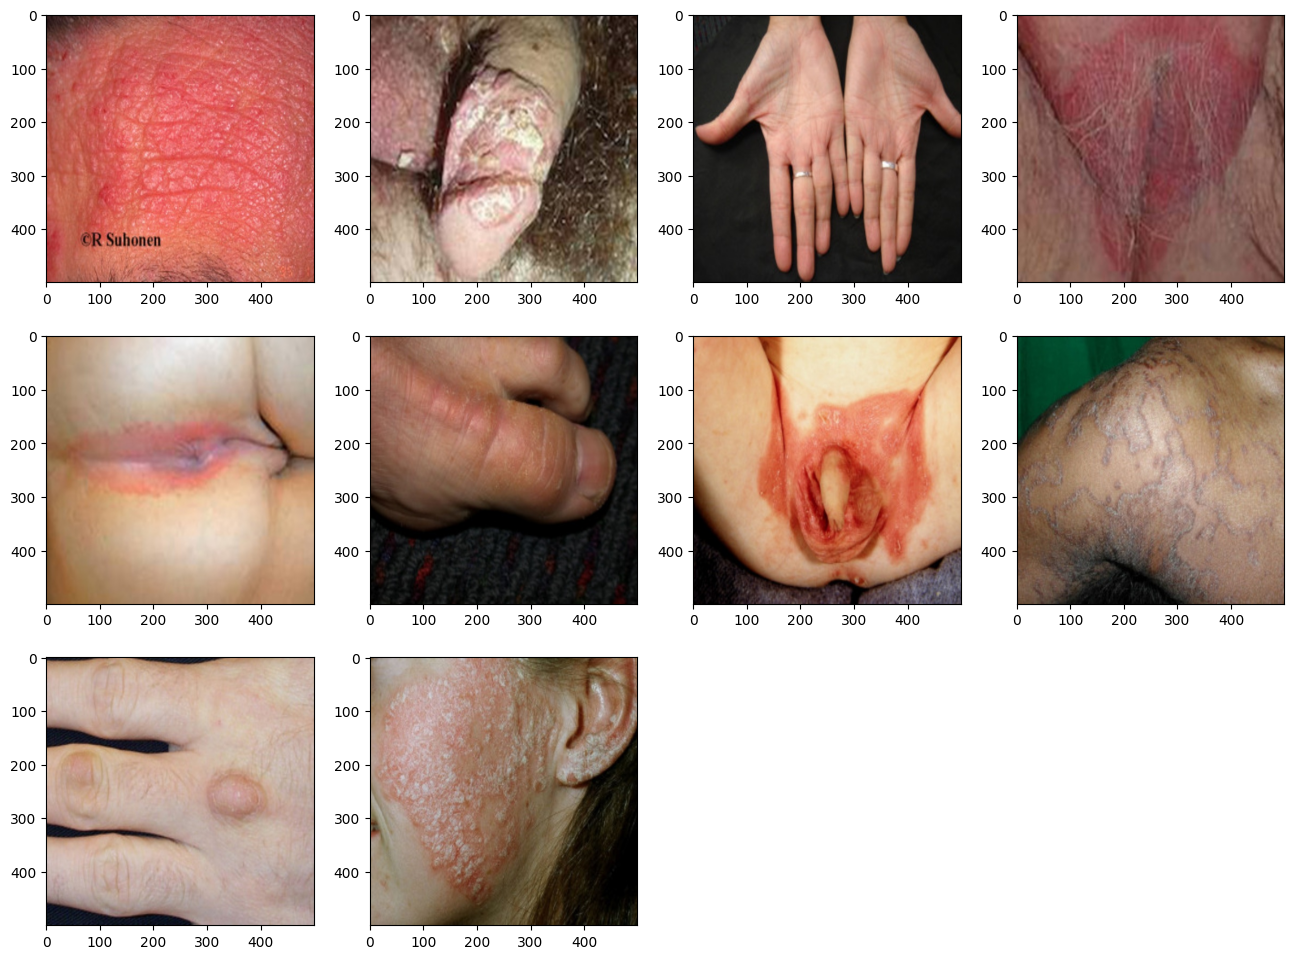

In [4]:
fig = plt.gcf()
fig.set_size_inches(16, 16) 
for i, img_path in enumerate(psoriasis_images ):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('On')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
base_dir = 'C:/Users/salon/Desktop/Jupyter/acne vs eczema vs psoriasis/train'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)


Found 3464 files belonging to 3 classes.
Using 3118 files for training.
Found 3464 files belonging to 3 classes.
Using 346 files for validation.


In [33]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [38]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [39]:
history = model.fit(train_datagen,
          epochs=6,
          validation_data=test_datagen)


Epoch 1/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 598ms/step - accuracy: 0.7263 - loss: -2.9782 - val_accuracy: 0.4509 - val_loss: 193.1083
Epoch 2/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 592ms/step - accuracy: 0.7757 - loss: -12.4918 - val_accuracy: 0.7775 - val_loss: -55.3222
Epoch 3/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 595ms/step - accuracy: 0.7887 - loss: -27.6087 - val_accuracy: 0.6272 - val_loss: -97.4988
Epoch 4/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 594ms/step - accuracy: 0.7864 - loss: -47.7398 - val_accuracy: 0.5145 - val_loss: 7.9953
Epoch 5/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 594ms/step - accuracy: 0.7785 - loss: -77.9024 - val_accuracy: 0.3613 - val_loss: -128.7520
Epoch 6/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 593ms/step - accuracy: 0.7736 - loss: -119.0058 - val_accuracy: 0.7890 - val_loss: -320.1717


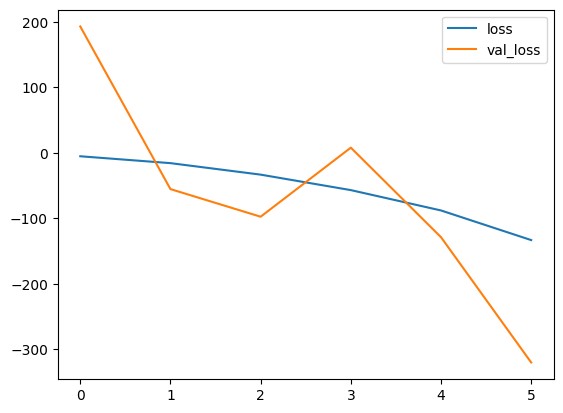

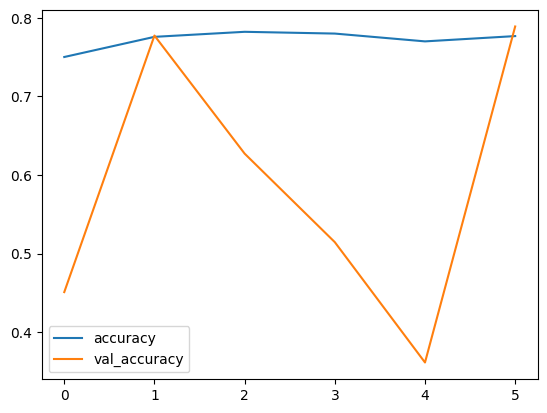

In [40]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
psoriasis
eczema


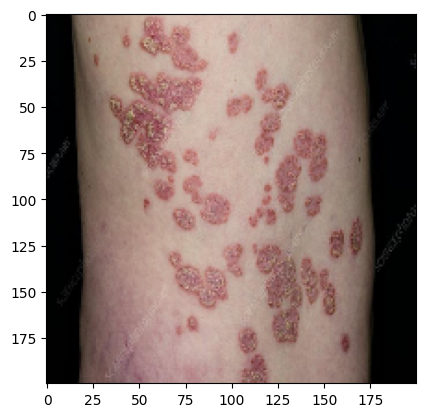

In [47]:
from keras.preprocessing import image

#Input image
test_image = image.load_img(r"C:\Users\salon\Desktop\Jupyter\acne vs eczema vs psoriasis\train\eczema\03_jpg.rf.81d98e0e3227d09e588fbc45e3ee8eb3.jpg",target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("psoriasis")
   

if(result<=0.2):
    print("acne")
   
else:
  print("eczema")
    
 







1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
eczmea


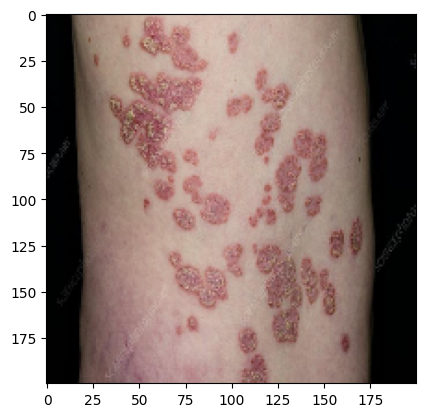

In [48]:
test_image = image.load_img(r"C:\Users\salon\Desktop\Jupyter\acne vs eczema vs psoriasis\train\eczema\03_jpg.rf.81d98e0e3227d09e588fbc45e3ee8eb3.jpg",target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.10):
  print("eczmea")

else:
  print("psoriasis")
